In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

In [20]:
df_gld = pd.read_csv(r"D:\study\tieu_luan_chuyen_nganh\demo\timeseries_hybrid\data\goldprice\gld_price_data.csv")
print(df_gld.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [21]:
data = df_gld[['GLD']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.12967974]
 [0.13587574]
 [0.13203593]
 ...
 [0.48154291]
 [0.47552142]
 [0.45853741]]


In [22]:
split_ratio = 0.8
split_idx = int(len(scaled_data) * split_ratio)
data_train, data_test = scaled_data[:split_idx], scaled_data[split_idx:]

In [23]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Chia dữ liệu thành chuỗi thời gian với mỗi bước là 5 ngày
time_step = 5
X_train, y_train = create_dataset(data_train, time_step)
X_test, y_test = create_dataset(data_test, time_step)
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
epochs= 50

# build the model
input_dim = X_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(units=64, activation='relu', input_dim=time_step))  # Lớp ẩn thứ nhất
lr_model.add(Dense(units=64, activation='relu'))  # Lớp ẩn thứ hai
lr_model.add(Dense(units=1))  # Lớp đầu ra

# compile the model
lr_model.compile(loss='mean_squared_error',
              optimizer='adam')

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
batch_size = 32

lr_model_history = lr_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0861 - val_loss: 3.9597e-04
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3214e-04 - val_loss: 1.7444e-04
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8263e-04 - val_loss: 1.4856e-04
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3798e-04 - val_loss: 1.1107e-04
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2650e-04 - val_loss: 1.0064e-04
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7963e-04 - val_loss: 1.0062e-04
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4928e-04 - val_loss: 8.8925e-05
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3797e-04 - val_loss: 8.2362e-05
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5418e-04 - val_loss: 1.3492e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8148e-04 - val_loss: 9.4711e-05
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2047e-04 - val_loss: 7

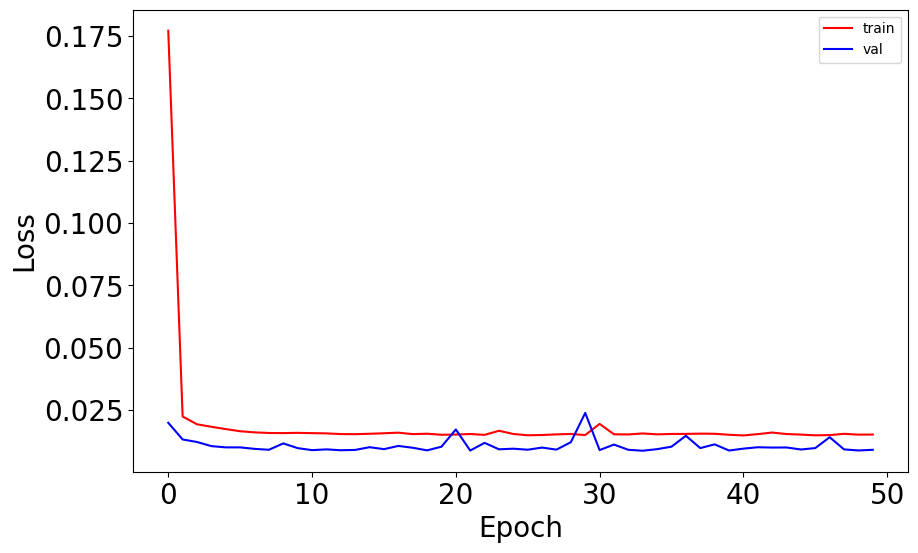

In [27]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
